In [48]:
import json 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
CLIP_FILTER = "clip_score_eval_results.jsonl"
X_TIME_CLIP_SCORE_FILTER = "x_time_clip_score_eval_results.jsonl"
NO_FILTER = "no_filter_eval_results.jsonl"

def analyze_json_file(filename):
    with open(filename, "r") as f:
        data = [(json.loads(line)['key'].split('/')[0], json.loads(line)['dataset'], json.loads(line)['metrics']['main_metric']) for line in f.readlines()]
    print(data)
    return data

no_filter_results = analyze_json_file(NO_FILTER)[:-2]
clip_filter_results = analyze_json_file(CLIP_FILTER)[:-2]
x_time_clip_score_results = analyze_json_file(X_TIME_CLIP_SCORE_FILTER)[:-2]

wins_vs_no_filter = 0
wins_vs_clip_filter = 0
for i in range(len(x_time_clip_score_results)):
    if x_time_clip_score_results[i][1] > no_filter_results[i][1]:
        wins_vs_no_filter += 1
    if x_time_clip_score_results[i][1] > clip_filter_results[i][1]:
        wins_vs_clip_filter += 1
        
difference_with_clip_filter = [x_time_clip_score_results[i][1] - clip_filter_results[i][1] for i in range(len(x_time_clip_score_results))]
average_difference_with_clip_filter = sum(difference_with_clip_filter) / len(difference_with_clip_filter)

print(no_filter_results)
print(clip_filter_results)
print(x_time_clip_score_results)

X = [x[0] for x in no_filter_results]
_X = np.arange(len(X))

plt.bar(_X - 0.2, [x[1] for x in no_filter_results], 0.2, label="No filter")
plt.bar(_X, [x[1] for x in clip_filter_results], 0.2, label="Clip filter")
plt.bar(_X + 0.2, [x[1] for x in x_time_clip_score_results], 0.2, label="X time clip score filter")
plt.xticks(_X, X, rotation=90)
plt.legend()
plt.title("DataComp Eval Results (Main Metrics)")
# add wins vs no filter and wins vs clip filter in a text box in the top left corner of the plot
plt.text(0, 0.6, f"Wins vs no filter: {round(wins_vs_no_filter/len(x_time_clip_score_results), 2)} ({wins_vs_no_filter}/{len(x_time_clip_score_results)})")
plt.text(0, 0.58, f"Wins vs clip filter: {round(wins_vs_clip_filter/len(x_time_clip_score_results), 2)} ({wins_vs_clip_filter}/{len(x_time_clip_score_results)})")
plt.text(0, 0.56, f"Average difference with clip filter: {round(average_difference_with_clip_filter, 5)}")
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

[('vtab', 'Caltech-101', 0.14706502721589657), ('cifar10', 'CIFAR-10', 0.3226), ('vtab', 'CIFAR-100', 0.1127), ('vtab', 'CLEVR Counts', 0.12406666666666667), ('vtab', 'CLEVR Distance', 0.20246666666666666), ('country211', 'Country211', 0.011990521327014218), ('vtab', 'Describable Textures', 0.054787234042553194), ('vtab', 'EuroSAT', 0.1348148148148148), ('fgvc_aircraft', 'FGVC Aircraft', 0.01264705882352941), ('food101', 'Food-101', 0.04788118811881188), ('gtsrb', 'GTSRB', 0.037450514647664294), ('imagenet1k', 'ImageNet 1k', 0.02668), ('imagenet_sketch', 'ImageNet Sketch', 0.009589498712884906), ('imagenetv2', 'ImageNet v2', 0.0234), ('imagenet-a', 'ImageNet-A', 0.011466666666666667), ('imagenet-o', 'ImageNet-O', 0.093), ('imagenet-r', 'ImageNet-R', 0.037066666666666664), ('vtab', 'KITTI Vehicle Distance', 0.27566807313642755), ('mnist', 'MNIST', 0.1384), ('objectnet', 'ObjectNet', 0.037417895983633036), ('vtab', 'Oxford Flowers-102', 0.024015745892707666), ('vtab', 'Oxford-IIIT Pet', 

TypeError: unsupported operand type(s) for -: 'str' and 'str'

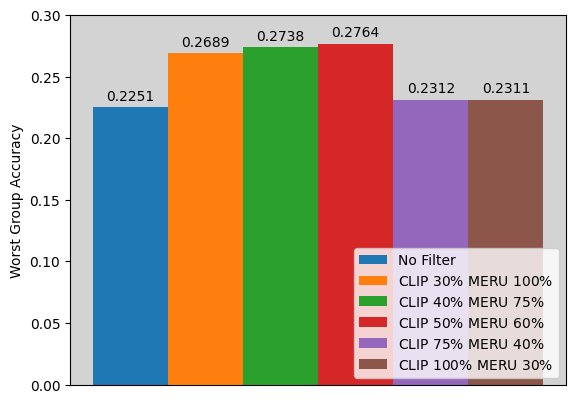

In [57]:
MERU_FILTER_100 = "/local1/siting/meru_ckpts/clip_score/eval_results.jsonl"
MERU_FILTER_75 = "/local1/siting/meru_ckpts/meru_0.75_clip_0.4/eval_results.jsonl"
MERU_FILTER_60 = "/local1/siting/meru_ckpts/meru_0.6_clip_0.5/eval_results.jsonl"
MERU_FILTER_40 = "/local1/siting/meru_ckpts/meru_0.4_clip_0.75/eval_results.jsonl"
MERU_FILTER_30 = "/local1/siting/meru_ckpts/meru_0.3_clip_1/eval_results.jsonl"
NO_FILTER = "/local1/siting/meru_ckpts/first_try/eval_results.jsonl"

def analyze_json_file(filename):
    with open(filename, "r") as f:
        data = [(json.loads(line)['key'].split('/')[0], json.loads(line)['dataset'], json.loads(line)['metrics']['main_metric']) for line in f.readlines()]
    # print(data)
    return data

no_filter_results = analyze_json_file(NO_FILTER)[:-2]
meru_filter_100_results = analyze_json_file(MERU_FILTER_100)[:-2]
meru_filter_75_results = analyze_json_file(MERU_FILTER_75)[:-2]
meru_filter_60_results = analyze_json_file(MERU_FILTER_60)[:-2]
meru_filter_40_results = analyze_json_file(MERU_FILTER_40)[:-2]
meru_filter_30_results = analyze_json_file(MERU_FILTER_30)[:-2]

categories = ['imagenet1k', 'imagenet-shifts', 'vtab', 'retrieval', 'wilds', 'fairness']
per_category_results = {category: {
    'no_filter':[], 
    'MERU_100':[], 
    'MERU_75':[],
    'MERU_60':[],
    'MERU_40':[],
    'MERU_30':[]} for category in categories}

for category, dataset, value in no_filter_results:
    typekey = 'no_filter'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in meru_filter_100_results:
    typekey = 'MERU_100'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in meru_filter_75_results:
    typekey = 'MERU_75'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in meru_filter_60_results:
    typekey = 'MERU_60'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in meru_filter_40_results:
    typekey = 'MERU_40'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in meru_filter_30_results:
    typekey = 'MERU_30'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue
    
no_filter_means = {category: np.mean(per_category_results[category]['no_filter']) for category in categories}
meru_filter_100_means = {category: np.mean(per_category_results[category]['MERU_100']) for category in categories}
meru_filter_75_means = {category: np.mean(per_category_results[category]['MERU_75']) for category in categories}
meru_filter_60_means = {category: np.mean(per_category_results[category]['MERU_60']) for category in categories}
meru_filter_40_means = {category: np.mean(per_category_results[category]['MERU_40']) for category in categories}
meru_filter_30_means = {category: np.mean(per_category_results[category]['MERU_30']) for category in categories}


# plot results for imagenet1k, imagenet-shifts, vtab with accuracy as y axis
fig, ax = plt.subplots()
categories = ['fairness'] # ['imagenet1k', 'imagenet-shifts', 'vtab', 'retrieval', 'wilds', 'fairness']
x = np.arange(len(categories))
width = 0.2
no_filter_means = [no_filter_means[category] for category in categories]
meru_filter_100_means = [meru_filter_100_means[category] for category in categories]
meru_filter_75_means = [meru_filter_75_means[category] for category in categories]
meru_filter_60_means = [meru_filter_60_means[category] for category in categories]
meru_filter_40_means = [meru_filter_40_means[category] for category in categories]
meru_filter_30_means = [meru_filter_30_means[category] for category in categories]

# change color scheme of bars
ax.set_facecolor('lightgrey')
# fig.patch.set_facecolor('lightgrey')


rects = []
rects.append(ax.bar(x - 2.5*width, no_filter_means, width, label='No Filter', color='tab:blue'))
rects.append(ax.bar(x - 1.5*width, meru_filter_100_means, width, label='CLIP '+r'$30\%$'+' MERU '+r'$100\%$', color='tab:orange'))
rects.append(ax.bar(x - 0.5*width, meru_filter_75_means, width, label='CLIP '+r'$40\%$'+' MERU '+r'$75\%$', color='tab:green'))
rects.append(ax.bar(x + 0.5*width, meru_filter_60_means, width, label='CLIP '+r'$50\%$'+' MERU '+r'$60\%$', color='tab:red'))
rects.append(ax.bar(x + 1.5*width, meru_filter_40_means, width, label='CLIP '+r'$75\%$'+' MERU '+r'$40\%$', color='tab:purple'))
rects.append(ax.bar(x + 2.5*width, meru_filter_30_means, width, label='CLIP '+r'$100\%$'+' MERU '+r'$30\%$', color='tab:brown'))

ax.legend(loc='lower right')

# label x axis with categories
ax.set_ylim(0.00, 0.3)
ax.set_xticks([])

# annotate each bar with number
for rectss in rects:
    for rect in rectss:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel("Worst Group Accuracy")

plt.savefig('fairness.pdf', dpi=300)

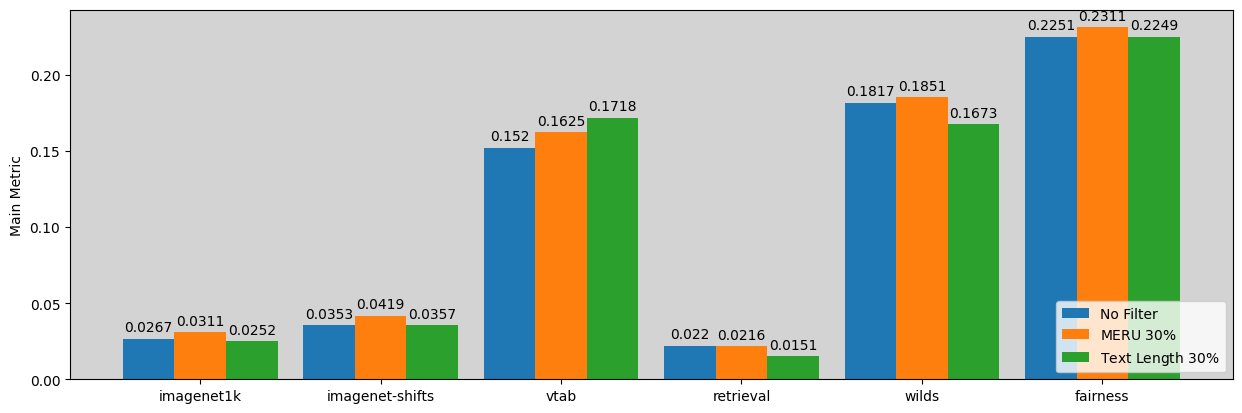

In [47]:
TEXT_FILTER_30 = "/local1/siting/meru_ckpts/text_0.3_clip_1/eval_results.jsonl"
MERU_FILTER_30 = "/local1/siting/meru_ckpts/meru_0.3_clip_1/eval_results.jsonl"
NO_FILTER = "/local1/siting/meru_ckpts/first_try/eval_results.jsonl"

def analyze_json_file(filename):
    with open(filename, "r") as f:
        data = [(json.loads(line)['key'].split('/')[0], json.loads(line)['dataset'], json.loads(line)['metrics']['main_metric']) for line in f.readlines()]
    # print(data)
    return data

no_filter_results = analyze_json_file(NO_FILTER)[:-2]
text_filter_results = analyze_json_file(TEXT_FILTER_30)[:-2]
meru_filter_30_results = analyze_json_file(MERU_FILTER_30)[:-2]

categories = ['imagenet1k', 'imagenet-shifts', 'vtab', 'retrieval', 'wilds', 'fairness']
per_category_results = {category: {
    'no_filter':[], 
    'TEXT_30':[],
    'MERU_30':[]} for category in categories}

for category, dataset, value in no_filter_results:
    typekey = 'no_filter'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in text_filter_results:
    typekey = 'TEXT_30'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue

for category, dataset, value in meru_filter_30_results:
    typekey = 'MERU_30'
    if category in per_category_results:
        per_category_results[category][typekey].append(value)
    elif (('imagenet' in category) or (category == 'objectnet')) and category != 'imagenet1k':
        per_category_results['imagenet-shifts'][typekey].append(value)
    else:
        continue
    
no_filter_means = {category: np.mean(per_category_results[category]['no_filter']) for category in categories}
text_filter_30_means = {category: np.mean(per_category_results[category]['TEXT_30']) for category in categories}
meru_filter_30_means = {category: np.mean(per_category_results[category]['MERU_30']) for category in categories}


# plot results for imagenet1k, imagenet-shifts, vtab with accuracy as y axis

fig, ax = plt.subplots()
fig.set_figwidth(15)
categories = ['imagenet1k', 'imagenet-shifts', 'vtab', 'retrieval', 'wilds', 'fairness'] # ['imagenet1k', 'imagenet-shifts', 'vtab', 'retrieval', 'wilds', 'fairness']
x = np.arange(len(categories))*0.7
width = 0.2
no_filter_means = [no_filter_means[category] for category in categories]
text_filter_30_means = [text_filter_30_means[category] for category in categories]
meru_filter_30_means = [meru_filter_30_means[category] for category in categories]

# change color scheme of bars
ax.set_facecolor('lightgrey')
# fig.patch.set_facecolor('lightgrey')


rects = []
rects.append(ax.bar(x - width, no_filter_means, width, label='No Filter', color='tab:blue'))
rects.append(ax.bar(x, meru_filter_30_means, width, label='MERU '+r'$30\%$', color='tab:orange'))
rects.append(ax.bar(x + width, text_filter_30_means, width, label='Text Length '+r'$30\%$', color='tab:green'))

ax.legend(loc='lower right')

# label x axis with categories
ax.set_xticks(x)
ax.set_xticklabels(categories)


# annotate each bar with number
for rectss in rects:
    for rect in rectss:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel("Main Metric")

plt.savefig('fairness.pdf', dpi=300)

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import json

with open('/gscratch/krishna/sgeng/synth/neural-priming/test.json') as f:
    class_to_img = json.load(f)

# def display_image, a function that takes list of jpgs and displays on a grid with multiple rows
def display_image(jpgs):
    fig, ax = plt.subplots(1, len(jpgs), figsize=(20, 20))
    for i, jpg in enumerate(jpgs):
        img = Image.open(jpg)
        ax[i].imshow(img)
        ax[i].axis('off')

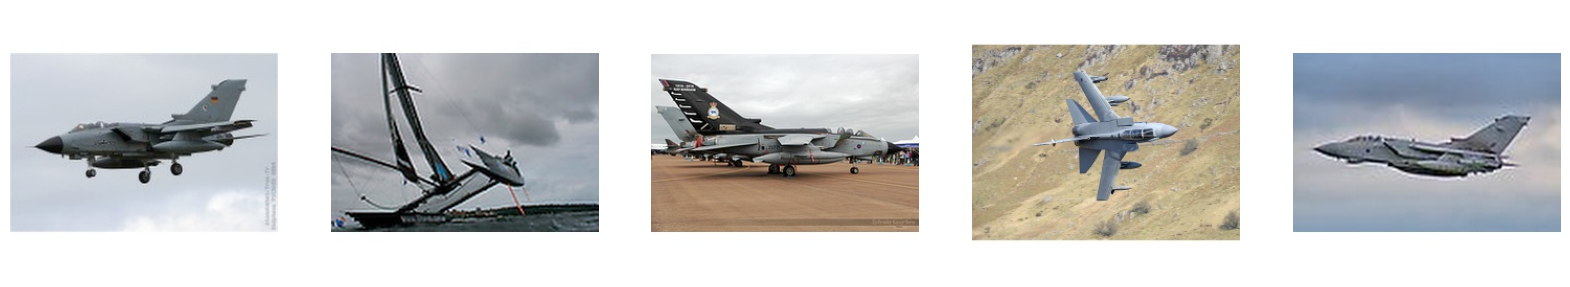

In [13]:
display_image(class_to_img['96'][5:10])

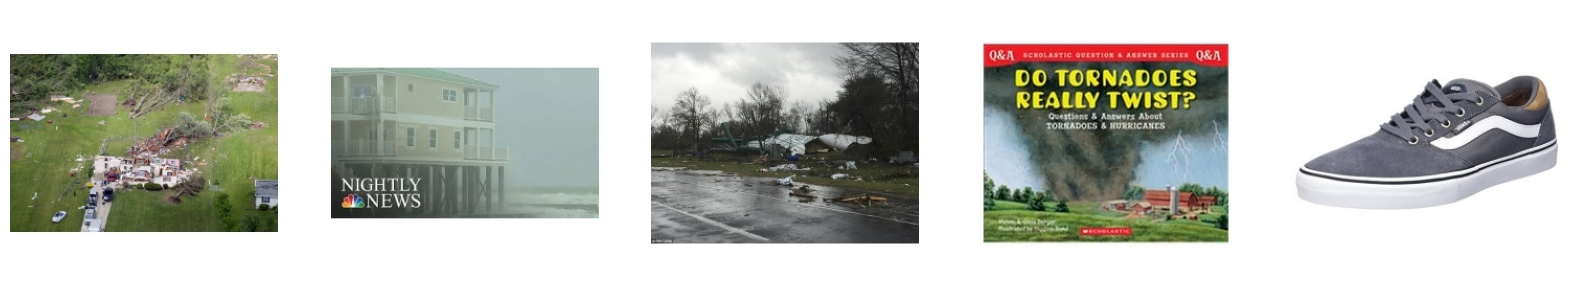

In [17]:
import glob
raw = glob.glob('/scr/sgeng/aircraft-retrieved/Tornado/*.jpg')
display_image(raw[10:15])